# EDA

In [11]:
#base libraries for general manipulation and loading of data
import pandas as pd
import numpy as np
import os
import json
import warnings
import random

#our custom functions library
import functions_variables as fv

#our machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#our Plotting and graphing and visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

#turn off the futureproofing libraries
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Importing

In [12]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open('..\data\AK_Juneau_4.json', 'r') as f:
    data = json.load(f)
#show me the data
pprint(data)
#create a data frame to see what the information is
testing_df = pd.DataFrame(data['data']['results'])


{'data': {'count': 4,
          'results': [{'branding': [{'name': None,
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': None,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': None,
                                       'baths_half': None,
                                       'beds': None,
                                       'garage': None,
                                       'lot_sqft': None,
                                       'name': None,
                                       'sold_date': '2023-08-21',
                                       'sold_price': None,
                                       'sqft': None,
                                       'stories': None,
                                  

In [13]:
testing_df

,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,description,branding,...,photos,flags,community,products,virtual_tours,other_listings,listing_id,price_reduced_amount,location,matterport
0,None,None,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958924367', 'listing...",None,None,"{'address': {'postal_code': '99801', 'state': ...",False
1,None,2023-08-04T22:49:14Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, hill_or_mountain_view, ocean_view, s...",11909-Glacier-Hwy-Apt-105_Juneau_AK_99801_M741...,sold,2023-08-21T21:01:22.000000Z,None,"{'year_built': 1969, 'baths_3qtr': None, 'sold...",[{'name': 'Platinum Keller Williams Realty Ala...,...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,{'brand_name': 'basic_opt_in'},None,"{'rdc': [{'listing_id': '2958925334', 'listing...",2958925334,None,"{'address': {'postal_code': '99801', 'state': ...",False
2,None,2023-08-04T21:31:44Z,"{'plan_id': None, 'agents': [{'office_name': '...","[city_view, community_outdoor_space, community...",808-5th-St_Juneau_AK_99801_M76604-90777,sold,2023-08-21T21:01:22.000000Z,None,"{'year_built': 1920, 'baths_3qtr': None, 'sold...","[{'name': 'Southeast Alaska Real Estate', 'pho...",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,{'brand_name': 'essentials'},None,"{'rdc': [{'listing_id': '2958924095', 'listing...",2958924095,None,"{'address': {'postal_code': '99801', 'state': ...",False
3,None,2023-12-07,None,None,4446-Trafalgar-Ave_Juneau_AK_99801_M82741-21172,sold,None,None,"{'year_built': 2002, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,None,None,None,"{'address': {'postal_code': '99801', 'state': ...",False


 - After looking through the file we can deduce all the information we need is inside ['data']['results']

In [14]:
# loop over all files and put them into a dataframe
#Create the variables we will use to loop the data
folder_name = '..\data'
filenames = os.listdir(folder_name)
df = pd.DataFrame()
empty_files = []
#Iterate through every data file we have
for file in filenames:
    #ensure files are "json" files
    if file.endswith(".json"):
        file_path = os.path.join(folder_name, file)

        with open(file_path, 'r') as f:
            try:
                data = json.load(f)
                #create a small dataframe which we will add onto the large one
                small_df = pd.DataFrame(data['data']['results'])
                # print(file, "Loaded Sucessfully") - for testing purposes
                #add the new data to the bottom of our dataframe
                if small_df.empty:
                    # print("file is empty:", file)
                    empty_files.append(file)
                else:
                    df = pd.concat([df, small_df], ignore_index = True)
            except json.JSONDecodeError as e:
                #print if there was an error
                print("Error Decoding file:", e, file)
    else:
        #print out any files that are not part of it
        print("Not a Json:", file)
print(f"\nDataframe has {df.shape[0]} rows and {df.shape[1]} columns")            
df.head()


Not a Json: .gitkeep
Not a Json: license.txt
Not a Json: models
Not a Json: processed
Not a Json: uscities.csv

Dataframe has 8159 rows and 23 columns


,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,description,branding,...,photos,flags,community,products,virtual_tours,other_listings,listing_id,price_reduced_amount,location,matterport
0,{'href': 'https://ap.rdcpix.com/07097d34c98a59...,2023-09-19T20:52:50Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"{'year_built': 1963, 'baths_3qtr': None, 'sold...","[{'name': 'EXP Realty LLC - Southeast Alaska',...",...,"[{'tags': [{'label': 'house_view', 'probabilit...","{'is_new_construction': None, 'is_for_rent': N...",None,{'brand_name': 'basic_opt_in'},None,"{'rdc': [{'listing_id': '2957241843', 'listing...",2957241843,45000.0,"{'address': {'postal_code': '99801', 'state': ...",False
1,None,None,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958935271', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
2,None,None,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958935192', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
3,None,None,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958925235', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
4,None,None,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958924367', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False


 - check all the files we had that were empty, this involved a random selection and manually checking 10 files to ensure they are indeed empty

In [15]:
print(len(empty_files))
random.seed(42)
random.sample(empty_files, 10)

32


['MS_Jackson_0.json',
 'HI_Honolulu_3.json',
 'VT_Montpelier_1.json',
 'MS_Jackson_1.json',
 'WY_Cheyenne_4.json',
 'WY_Cheyenne_0.json',
 'ME_Augusta_2.json',
 'WY_Cheyenne_2.json',
 'ME_Augusta_1.json',
 'SD_Pierre_4.json']

## Data Cleaning and Wrangling

 - Starting to look through the data, we can see lots of nulls and some null columns, some contain lists and we will need to break those apart.

In [16]:
df.info() # looks like we only actually want the information in "location", "tags", "property_id" and "description"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary_photo         7403 non-null   object 
 1   last_update_date      8125 non-null   object 
 2   source                7752 non-null   object 
 3   tags                  7638 non-null   object 
 4   permalink             8159 non-null   object 
 5   status                8159 non-null   object 
 6   list_date             7752 non-null   object 
 7   open_houses           0 non-null      object 
 8   description           8159 non-null   object 
 9   branding              8159 non-null   object 
 10  list_price            7721 non-null   float64
 11  lead_attributes       8159 non-null   object 
 12  property_id           8159 non-null   object 
 13  photos                7403 non-null   object 
 14  flags                 8159 non-null   object 
 15  community            

 - describe doesn't give us much just yet, lets clean things up and try it again later

In [17]:
df.describe()

,list_price,price_reduced_amount
count,7.721000e+03,2.484000e+03
mean,4.341582e+05,2.442704e+04
std,5.514925e+05,7.162396e+04
min,1.000000e+00,1.000000e+02
25%,2.090000e+05,6.000000e+03
50%,3.250000e+05,1.010000e+04
75%,4.999000e+05,2.000000e+04
max,1.250000e+07,2.015999e+06


 - Lets start building a list of columns we will be dropping
    - some are obvious that we don't need(picture urls, sold date, etc.), some are reptitive data (baths 1qtr, baths half, baths 3qtr, etc.)

In [18]:
#lets make a full list of columns we want to get rid of:
print("columns before drop:", list(df.columns))
columns_to_drop = ['primary_photo',
                   'last_update_date',
                     'source', 
                      'permalink',
                        'status',
                          'list_date',
                           'open_houses',
                            'branding',
                             'list_price',
                              'lead_attributes',
                                'photos',
                                'virtual_tours',
                                'other_listings',
                                 'listing_id',
                                  'price_reduced_amount',
                                   'matterport',
                                    'sold_date',
                                     'products',
                                      'street_view_url',
                                       'community',
                                        'county',
                                         'line',
                                           'flags',
                                            'name',
                                             'baths_1qtr',
                                              'sub_type',
                                               'baths_full',
                                                'baths_half',
                                                 'baths_3qtr',
                                                  'state_code']


print("columns to drop:", columns_to_drop)


columns before drop: ['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport']
columns to drop: ['primary_photo', 'last_update_date', 'source', 'permalink', 'status', 'list_date', 'open_houses', 'branding', 'list_price', 'lead_attributes', 'photos', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'matterport', 'sold_date', 'products', 'street_view_url', 'community', 'county', 'line', 'flags', 'name', 'baths_1qtr', 'sub_type', 'baths_full', 'baths_half', 'baths_3qtr', 'state_code']


 - The Description column has nested information so we are going to use our break_it_down function we have written to correct that

In [19]:
#description column is nested, lets pull it out and put it back in all split up nice and pretty

desc_df = fv.break_it_down(df['description'])
columns_to_drop.append('description')
df[desc_df.columns] = desc_df
df[desc_df.columns]



,year_built,baths_3qtr,sold_date,sold_price,baths_full,name,baths_half,lot_sqft,sqft,baths,sub_type,baths_1qtr,garage,stories,beds,type
0,1963,None,2023-09-18,None,2,None,None,10454,1821,2,None,None,1,None,3,single_family
1,None,None,2023-08-22,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,2023-08-22,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,2023-08-21,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,2023-08-21,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,1910,None,2023-07-27,99000,1,None,None,4792,1214,1,None,None,1,2,3,single_family
8155,None,None,2023-07-27,29700,1,None,None,7841,988,1,None,None,None,None,3,single_family
8156,None,None,2023-07-24,162250,1,None,None,65340,1470,1,None,None,None,None,3,single_family
8157,None,None,2023-07-24,63800,None,None,None,None,None,0,None,None,None,None,0,single_family


 - Similar we will do the same to the location column

In [10]:
#lets do the same with the "location column"
loc_df = fv.break_it_down(df['location'])
columns_to_drop.append('location')
df[loc_df.columns] = loc_df
df[loc_df.columns]



,address,street_view_url,county
0,"{'postal_code': '99801', 'state': 'Alaska', 'c...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': None, 'name': 'Juneau'}"
1,"{'postal_code': '99801', 'state': 'Alaska', 'c...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': None, 'name': 'Juneau'}"
2,"{'postal_code': '99801', 'state': 'Alaska', 'c...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': None, 'name': 'Juneau'}"
3,"{'postal_code': '99801', 'state': 'Alaska', 'c...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': None, 'name': 'Juneau'}"
4,"{'postal_code': '99801', 'state': 'Alaska', 'c...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': None, 'name': 'Juneau'}"
...,...,...,...
8154,"{'postal_code': '25314', 'state': 'West Virgin...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '54039', 'name': 'Kanawha'}"
8155,"{'postal_code': '25387', 'state': 'West Virgin...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '54039', 'name': 'Kanawha'}"
8156,"{'postal_code': '25314', 'state': 'West Virgin...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '54039', 'name': 'Kanawha'}"
8157,"{'postal_code': '25302', 'state': 'West Virgin...",https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '54039', 'name': 'Kanawha'}"


 - We can see address is still nested so lets break that down as well

In [11]:
#unfortunately "address" is still nested
address_df = fv.break_it_down(df['address'])
columns_to_drop.append('address')
df[address_df.columns] = address_df
df[address_df.columns]



,postal_code,state,coordinate,city,state_code,line
0,99801,Alaska,"{'lon': -134.59372, 'lat': 58.36395}",Juneau,AK,9453 Herbert Pl
1,99801,Alaska,None,Juneau,AK,8477 Thunder Mountain Rd
2,99801,Alaska,None,Juneau,AK,4515 Glacier Hwy
3,99801,Alaska,None,Juneau,AK,17850 Point Stephens Rd
4,99801,Alaska,None,Juneau,AK,9951 Stephen Richards Memorial Dr
...,...,...,...,...,...,...
8154,25314,West Virginia,"{'lon': -81.644994, 'lat': 38.341576}",Charleston,WV,1008 Oakmont Rd
8155,25387,West Virginia,"{'lon': -81.661662, 'lat': 38.377371}",Charleston,WV,1041 Temple St
8156,25314,West Virginia,"{'lon': -81.659885, 'lat': 38.338617}",Charleston,WV,238 Oakwood Rd
8157,25302,West Virginia,"{'lon': -81.644214, 'lat': 38.363038}",Charleston,WV,408 Lee St W


 - Lastly on that one coordinates are also still nested, lets break them down.

In [12]:
coordinate_df = fv.break_it_down(df['coordinate'])
columns_to_drop.append('coordinate')
df[coordinate_df.columns] = coordinate_df
df[coordinate_df.columns]



,lon,lat
0,-134.59372,58.36395
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
8154,-81.644994,38.341576
8155,-81.661662,38.377371
8156,-81.659885,38.338617
8157,-81.644214,38.363038


 - Now we need to get rid of all the columns we don't need as well as drop any rows that have a null in the sold price

In [13]:
#lets get rid of everything without a sold price
df = df.dropna(subset=['sold_price'])


df = df.drop(columns=columns_to_drop, axis=1)
print("columns after drops:", list(df.columns))

columns after drops: ['tags', 'property_id', 'year_built', 'sold_price', 'lot_sqft', 'sqft', 'baths', 'garage', 'stories', 'beds', 'type', 'postal_code', 'state', 'city', 'lon', 'lat']


 - Lets get into some feature engineering! \
-- easy one first, we need to fill in any place with a null for garage as a 0
 

In [14]:
#lets fill some NAN values, start with garage and the nones we can assume to be 0
df['garage'] = df['garage'].fillna(0)

- now we have some missing Longitude and Latitudes, we are going to replace those with an average longitude/latitude taken from the city they are in.

In [15]:
# lets take the average latitude and longitude for each city 
lon_lat_dict = df[['city', 'lon', 'lat']].groupby('city').mean().transpose().to_dict()
# lets fill those latitude and longitude back into the dataframe for each city

df = fv.item_replacement(lon_lat_dict, df, 'city', 'lon', 'lat')
df[df['lon'].isnull()].shape

(22, 16)

 - We still have 22 missing rows, fortunately they all boil down to 3 cities, a quick google search and I will use the lat/lon for those cities

In [16]:
missing_property_dict = {'Boone': {'lon': -93.885490, 'lat': 42.060650},
                'Garnett': {'lon': 81.2454, 'lat': 32.6063},
                'Charlton Heights': {'lon': -81.24385, 'lat': 38.13673}}
df = fv.item_replacement(missing_property_dict, df, 'city', 'lon', 'lat')
df[df['lon'].isnull()].shape

(0, 16)

 - Next we will be renaming the latitude and longituded columns as "property_lat" and "property_lon" \
  -- next we will look at cities

In [17]:
#change the name of the lat/lon column to 
df = df.rename(columns={'lat':'property_lat', 'lon': 'property_lon'})
df[df['city'].isnull()]

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat
5624,"[central_air, dishwasher, fireplace, forced_ai...",9712785298,1971,470000,34404,1618,2,2,1,3,single_family,43235,Ohio,None,-83.081039,40.102921
5665,"[central_air, dishwasher, fireplace, forced_ai...",9712785298,1971,470000,34404,1618,2,2,1,3,single_family,43235,Ohio,None,-83.081039,40.102921
5706,"[central_air, dishwasher, fireplace, forced_ai...",9712785298,1971,470000,34404,1618,2,2,1,3,single_family,43235,Ohio,None,-83.081039,40.102921
5747,"[central_air, dishwasher, fireplace, forced_ai...",9712785298,1971,470000,34404,1618,2,2,1,3,single_family,43235,Ohio,None,-83.081039,40.102921
5788,"[central_air, dishwasher, fireplace, forced_ai...",9712785298,1971,470000,34404,1618,2,2,1,3,single_family,43235,Ohio,None,-83.081039,40.102921


 - good news, it is just the one city missing so again with a quick google of that lon/lat we can see that is Columbus Ohio

In [18]:
df['city'] = df['city'].fillna('Columbus')
df[df['city'].isnull()]

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat


Next up is the "Type" Column, it has a few quick spelling things we are going to look at first

In [19]:
print(df['type'].unique())
df['type'].value_counts()

['single_family' 'land' 'townhomes' 'multi_family' 'apartment' 'mobile'
 'condos' 'condo' None 'other' 'duplex_triplex'
 'condo_townhome_rowhome_coop']


type
single_family                  4514
condos                          656
townhomes                       486
multi_family                    486
land                            316
mobile                          146
condo                            52
apartment                        20
other                            10
duplex_triplex                    5
condo_townhome_rowhome_coop       5
Name: count, dtype: int64

 - we will replace "other" with "land" and "condos" with "condo" as well as filling the empty cells with "land" \
   -- we will also drop the "condo_townhome_rowhome_coop" and "duplex_triplex" rows as when we remove the duplicates later we discover there is only one of each of those

In [20]:
type_mapping = {'other': 'land',
                'condos': 'condo',
                np.nan : 'land',
                }
df['type'] = df['type'].replace(type_mapping)
df = df[(df['type'] != 'condo_townhome_rowhome_coop') & (df['type'] != 'duplex_triplex')]
print(df['type'].unique())
df['type'].value_counts()

['single_family' 'land' 'townhomes' 'multi_family' 'apartment' 'mobile'
 'condo']


type
single_family    4514
condo             708
townhomes         486
multi_family      486
land              346
mobile            146
apartment          20
Name: count, dtype: int64

 - We are going to adjust all 'year_built', 'sqft', 'baths', 'stories', 'beds' all to 0 for the 'land' types (as they obviously would not have anything on them)

In [21]:
#lets change the 'year_built', 'sqft', 'baths', 'stories', 'beds' all to 0 for the 'land' types
to_change_list = ['year_built', 'sqft', 'baths', 'stories', 'beds']
for col in to_change_list:
    df.loc[(df['type'] == 'land') & (df[col].isna()), col] = 0 

df[df['type'] == 'land']

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat
40,"[horse_facilities, rental_property, big_lot, p...",9371305836,0,370000,3397680,0,0,0,0,0,land,36105,Alabama,Montgomery,-86.220291,32.155112
81,"[horse_facilities, rental_property, big_lot, p...",9371305836,0,370000,3397680,0,0,0,0,0,land,36105,Alabama,Montgomery,-86.220291,32.155112
121,"[horse_facilities, rental_property, big_lot, p...",9371305836,0,370000,3397680,0,0,0,0,0,land,36105,Alabama,Montgomery,-86.220291,32.155112
162,"[horse_facilities, rental_property, big_lot, p...",9371305836,0,370000,3397680,0,0,0,0,0,land,36105,Alabama,Montgomery,-86.220291,32.155112
203,"[horse_facilities, rental_property, big_lot, p...",9371305836,0,370000,3397680,0,0,0,0,0,land,36105,Alabama,Montgomery,-86.220291,32.155112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,[big_lot],3233095968,0,308,6098,0,0,0,0,0,land,25304,West Virginia,Charleston,-81.571146,38.306225
8145,[big_lot],3632053777,0,1122,11761,0,0,0,0,0,land,25306,West Virginia,Charleston,-81.498337,38.331983
8146,[big_lot],9021324566,0,583,73181,0,0,0,0,0,land,25311,West Virginia,Charleston,-81.625893,38.355711
8147,[big_lot],9577608280,0,2585,18295,0,0,0,0,0,land,25313,West Virginia,Charleston,-81.625893,38.355711


 - lets fill the missing year's built column with the mean from that column with no better method to fill

In [22]:
mean_year = df['year_built'].mean().astype(int)
print(mean_year)
df['year_built'] = df['year_built'].fillna(mean_year)

1860


 - Next we will look at fillings beds and baths, we will take an average of the amount of beds and baths depending on the type of the building and fill that back in

In [23]:
bed_bath_dict = df[['type', 'beds', 'baths']].groupby('type').mean().astype(int).transpose().to_dict()

df = fv.item_replacement(bed_bath_dict, df, 'type', 'beds','baths')
df[df['beds'].isnull() & df['baths'].isnull()]

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat


 - We have some nulls in the stories column, lets fill those in with a 1, as everything with more than 1 story should be filled already and all the "land" types have already been filled as a 0, we are also assigning the  column as an 'int' column to avoid some futureproofing issues

In [24]:
df['stories'] = df['stories'].fillna(1)

 - we are going to take a similar approach for sqft and lot_sqft, except this time we will take an average across the city and the type as different cities would have a different average building size

In [25]:
sqfts_dict = df[['city', 'type', 'sqft', 'lot_sqft']].groupby(['type','city']).mean().transpose().to_dict()

df = fv.sqfts_replacement(sqfts_dict, df)
df[df['sqft'].isnull() & df['lot_sqft'].isnull()]

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat
2346,[rental_property],9395716123,2016,32900,NaN,NaN,2,0,1,3,mobile,62707,Illinois,Springfield,-89.648263,39.785318
2348,[rental_property],9557243180,1997,12900,NaN,NaN,2,0,1,3,mobile,62707,Illinois,Springfield,-89.588087,39.84781
2351,[rental_property],9461804358,2015,29900,NaN,NaN,2,0,1,3,mobile,62707,Illinois,Springfield,-89.648263,39.785318
2354,[rental_property],9893909070,1994,19900,NaN,NaN,2,0,1,3,mobile,62702,Illinois,Springfield,-89.626747,39.847942
2356,[rental_property],9517334186,1995,18900,NaN,NaN,2,0,1,3,mobile,62702,Illinois,Springfield,-89.626747,39.847942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,None,9988039199,1860,51860,NaN,NaN,0,0,1,0,townhomes,29210,South Carolina,Columbia,-81.121758,34.069706
6716,None,9988039199,1860,51860,NaN,NaN,0,0,1,0,townhomes,29210,South Carolina,Columbia,-81.121758,34.069706
6748,None,9988039199,1860,51860,NaN,NaN,0,0,1,0,townhomes,29210,South Carolina,Columbia,-81.121758,34.069706
6779,None,9988039199,1860,51860,NaN,NaN,0,0,1,0,townhomes,29210,South Carolina,Columbia,-81.121758,34.069706


 - we still have some left that didn't have eenough data to create thosee averages so we will fill the rest in with an average by type not limited to cities

In [26]:
sqfts_dict_2 = df[['type', 'sqft', 'lot_sqft']].groupby('type').mean().transpose().to_dict()

df = fv.item_replacement(sqfts_dict_2, df, 'type', 'sqft', 'lot_sqft')
df[df['sqft'].isnull() & df['lot_sqft'].isnull()]

,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,property_lon,property_lat


- in the interest of saving some space and assigning things properly we will assign different columns to different types (int, float, etc.)

In [ ]:
#we need to assign datatypes to the columns, so we will make lists of the different types and re-enter them back in.
int_columns = ['year_built', 'sqft', 'lot_sqft', 'baths','garage','stories','beds', 'postal_code']
df[int_columns] = df[int_columns].astype(int)
category_columns = ['type']
df[category_columns] = df[category_columns].astype('category')
float_columns = ['property_lon', 'property_lat']
df[float_columns] = df[float_columns].astype('float64')
df['sold_price'] = df['sold_price'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6706 entries, 30 to 8158
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tags          6320 non-null   object  
 1   property_id   6706 non-null   object  
 2   year_built    6706 non-null   int32   
 3   sold_price    6706 non-null   int32   
 4   lot_sqft      6706 non-null   int32   
 5   sqft          6706 non-null   int32   
 6   baths         6706 non-null   int32   
 7   garage        6706 non-null   int32   
 8   stories       6706 non-null   int32   
 9   beds          6706 non-null   int32   
 10  type          6706 non-null   category
 11  postal_code   6706 non-null   int32   
 12  state         6706 non-null   object  
 13  city          6706 non-null   object  
 14  property_lon  6706 non-null   float64 
 15  property_lat  6706 non-null   float64 
dtypes: category(1), float64(2), int32(9), object(4)
memory usage: 609.4+ KB


### Dealing with Tags

Hitting Tags with the OHE and having the option to drop anything with 5 or less in its column

In [28]:
df = fv.encode_tags(df,min_to_drop=5)

df.shape

(1473, 140)

 - Whilst we are one hit encoding, lets go ahead and do the same with the "type" column

In [29]:
df = pd.get_dummies(df, columns=['type'], dummy_na=True)

 - Lets double check we have cleaned up all the non-numeric columns

In [30]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['property_id', 'state', 'city'], dtype='object')


We Can drop 'property_id' now, as we won't be needing that anymore, and will deal with the city/states next

In [31]:
df = df.drop('property_id', axis = 1)

### Dealing with Cities

we are using Geopy to run through each "city" and "state" and give us the coordinates for them all, it loops through 

In [32]:

df = fv.get_downtown_coordinates(df=df,city_col='city',state_col='state')
city_columns = ['city_lat', 'city_lon']
df = df.drop(['city', 'state'], axis=1)
df[city_columns] = df[city_columns].astype('float')
display(df[df['city_lat'].isnull() & df['city_lon'].isnull()])


Geocoding attempt 1 of 4...
Error geocoding Providence, Rhode Island: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Providence%2C+Rhode+Island%2C+downtown&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Geocoding attempt 2 of 4...


,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,postal_code,property_lon,...,type_apartment,type_condo,type_land,type_mobile,type_multi_family,type_single_family,type_townhomes,type_nan,city_lat,city_lon


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

## EDA/ Visualization



 - Lets start with our splitting and scaling so we can visualize everything in a similar range

In [33]:
X = df.drop('sold_price', axis=1)
y = df['sold_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
scaler = StandardScaler()
scaling_columns = int_columns + float_columns + city_columns
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

 - Lets check our numeric columns, and see how they all look compared to our sold price column

In [34]:
#we are going to use our scaled data to have easier visualisations
numeric_df = X_train[scaling_columns]
len(numeric_df.columns)

12

 - And lets see how they all look on a scatter plot

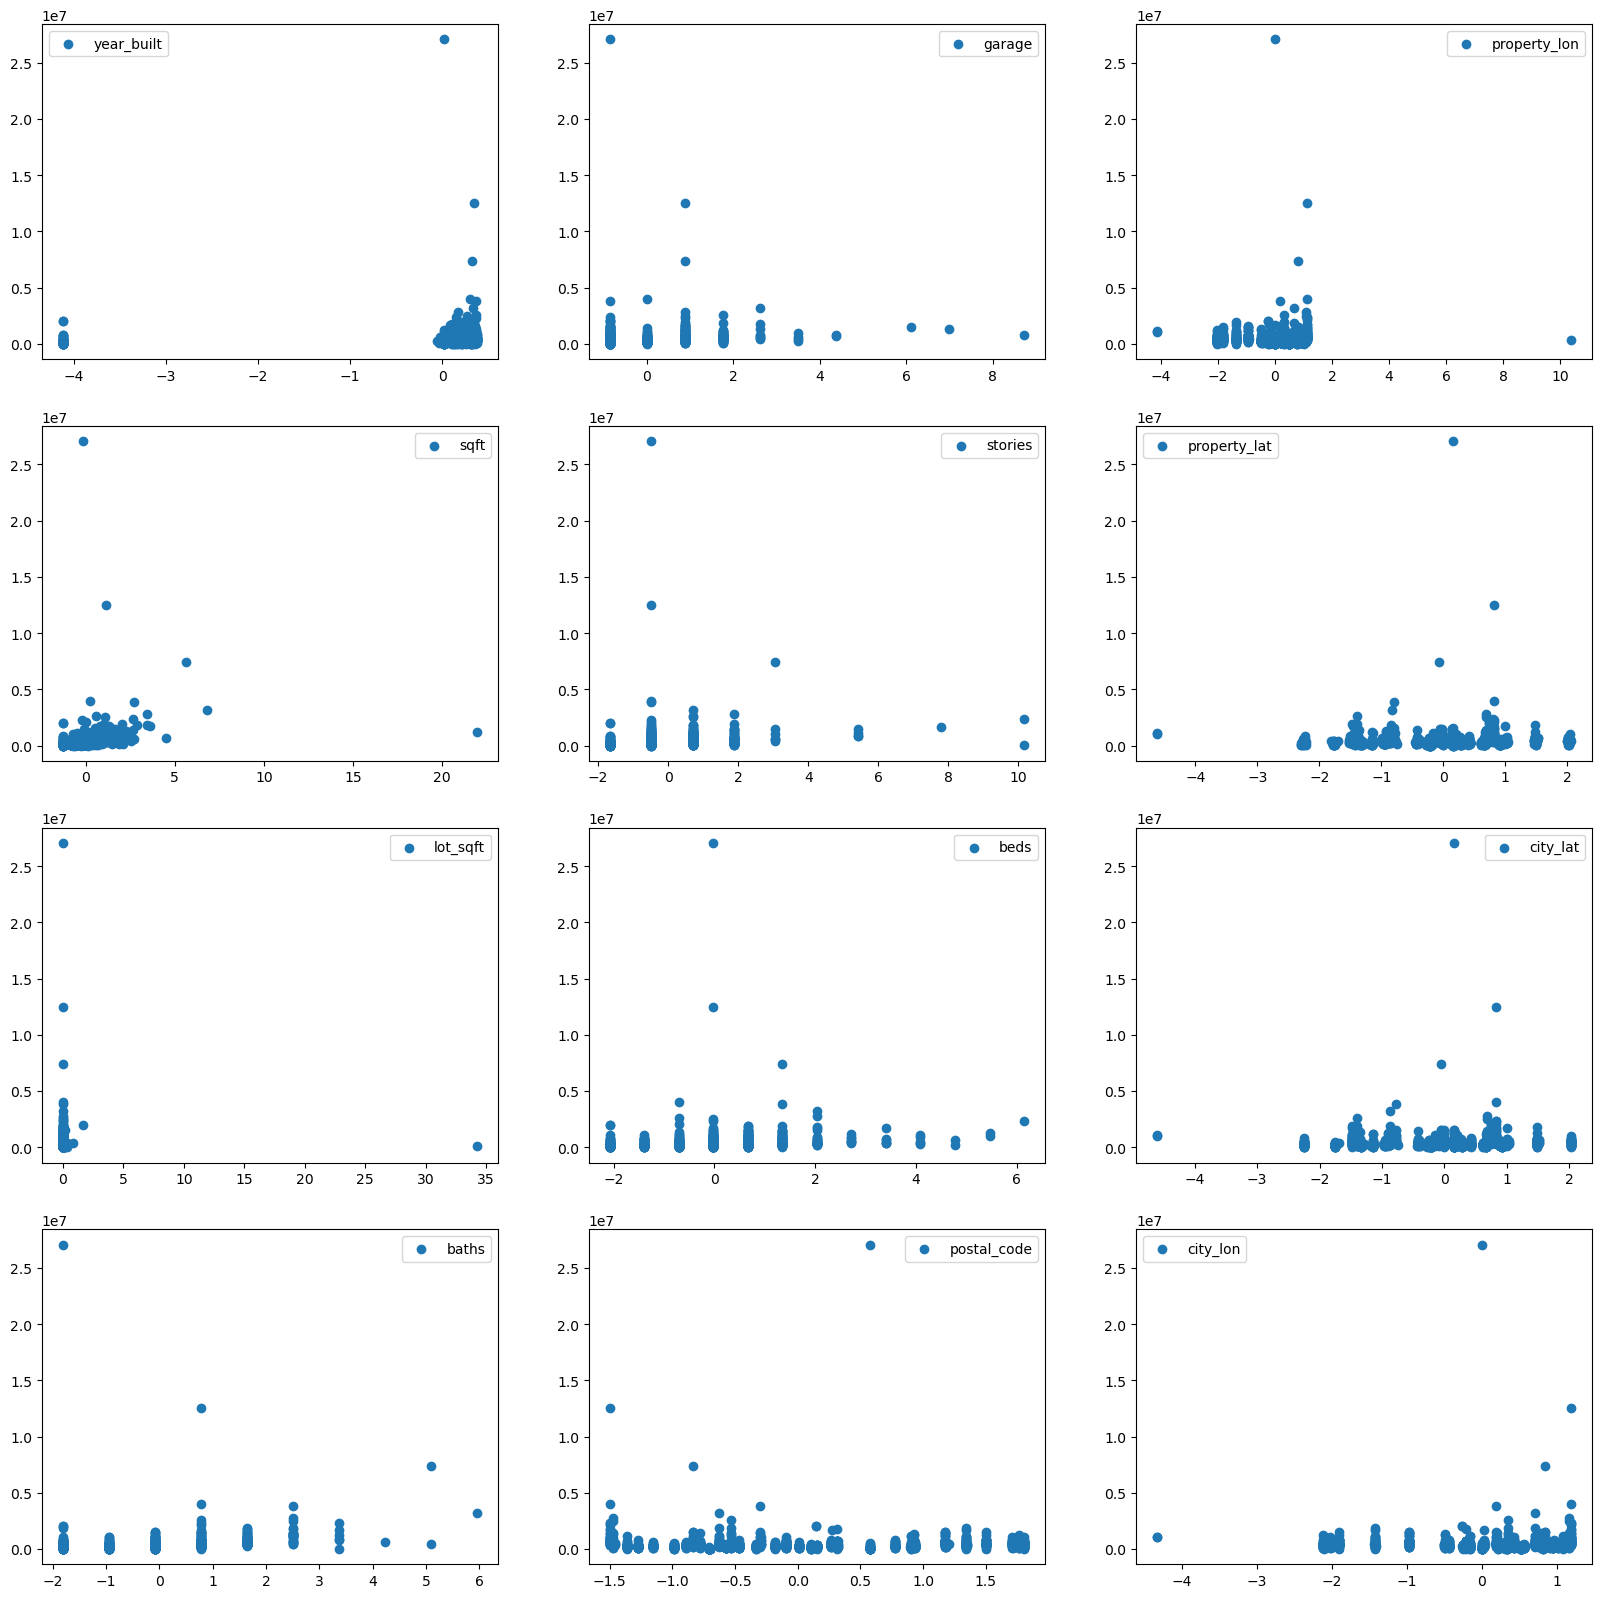

In [35]:
i = 0
c = 0
r = 0
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
while c <= 2:
    r = 0
    while r <= 3:
        axes[r,c].scatter(numeric_df.iloc[:,i],y_train, label = numeric_df.columns[i])
        axes[r,c].legend()
        i += 1
        r += 1
    c += 1
plt.tight_layout
plt.show()


 - Lets check the distribution of all that data
 

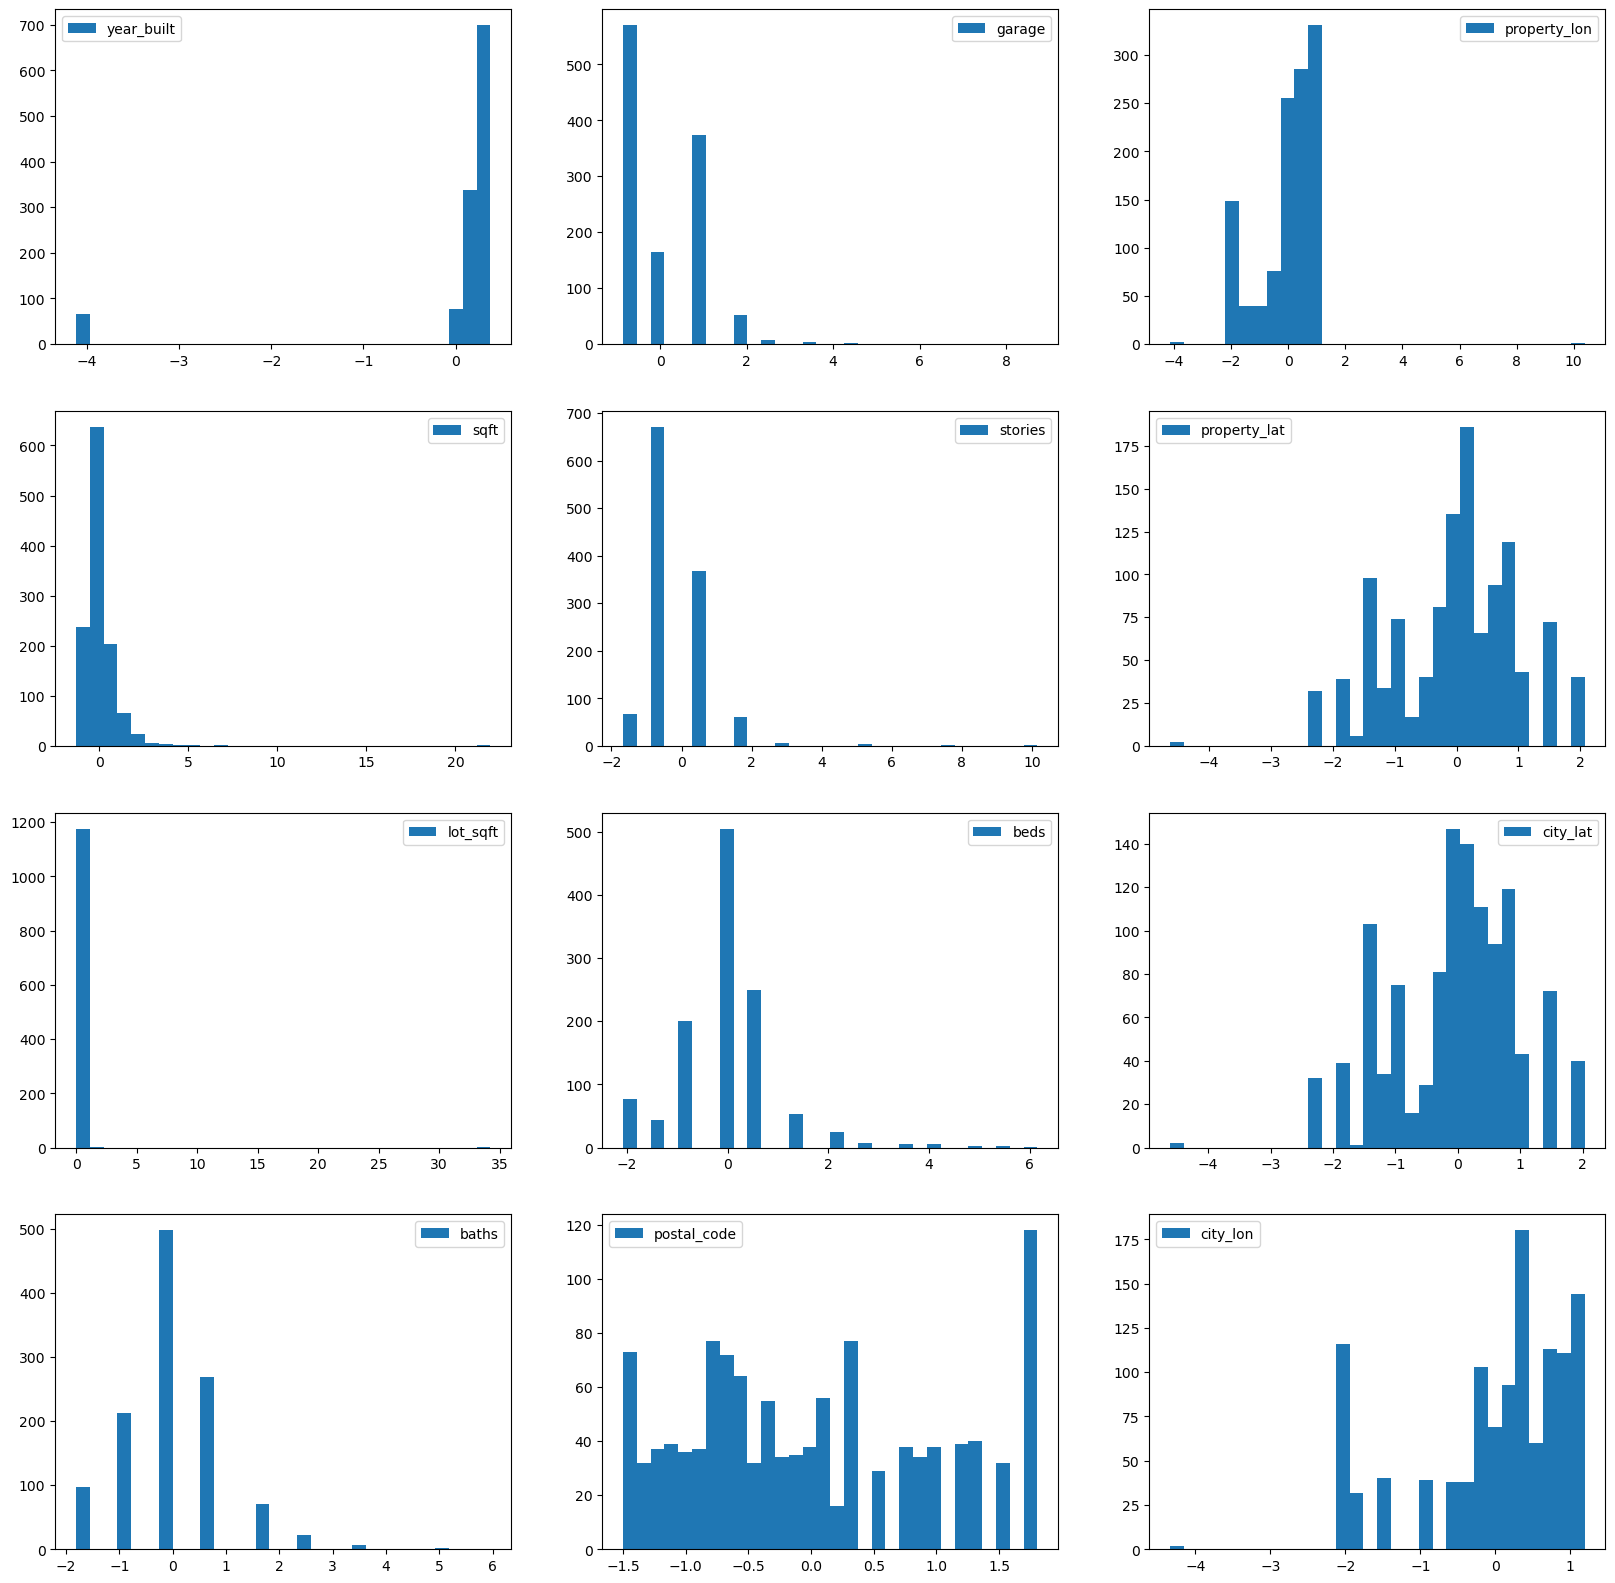

In [36]:
i = 0
c = 0
r = 0
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
while c <= 2:
    r = 0
    while r <= 3:
        axes[r,c].hist(numeric_df.iloc[:,i],bins = 30, label = numeric_df.columns[i])
        axes[r,c].legend()
        i += 1
        r += 1
    c += 1
plt.tight_layout
plt.show()

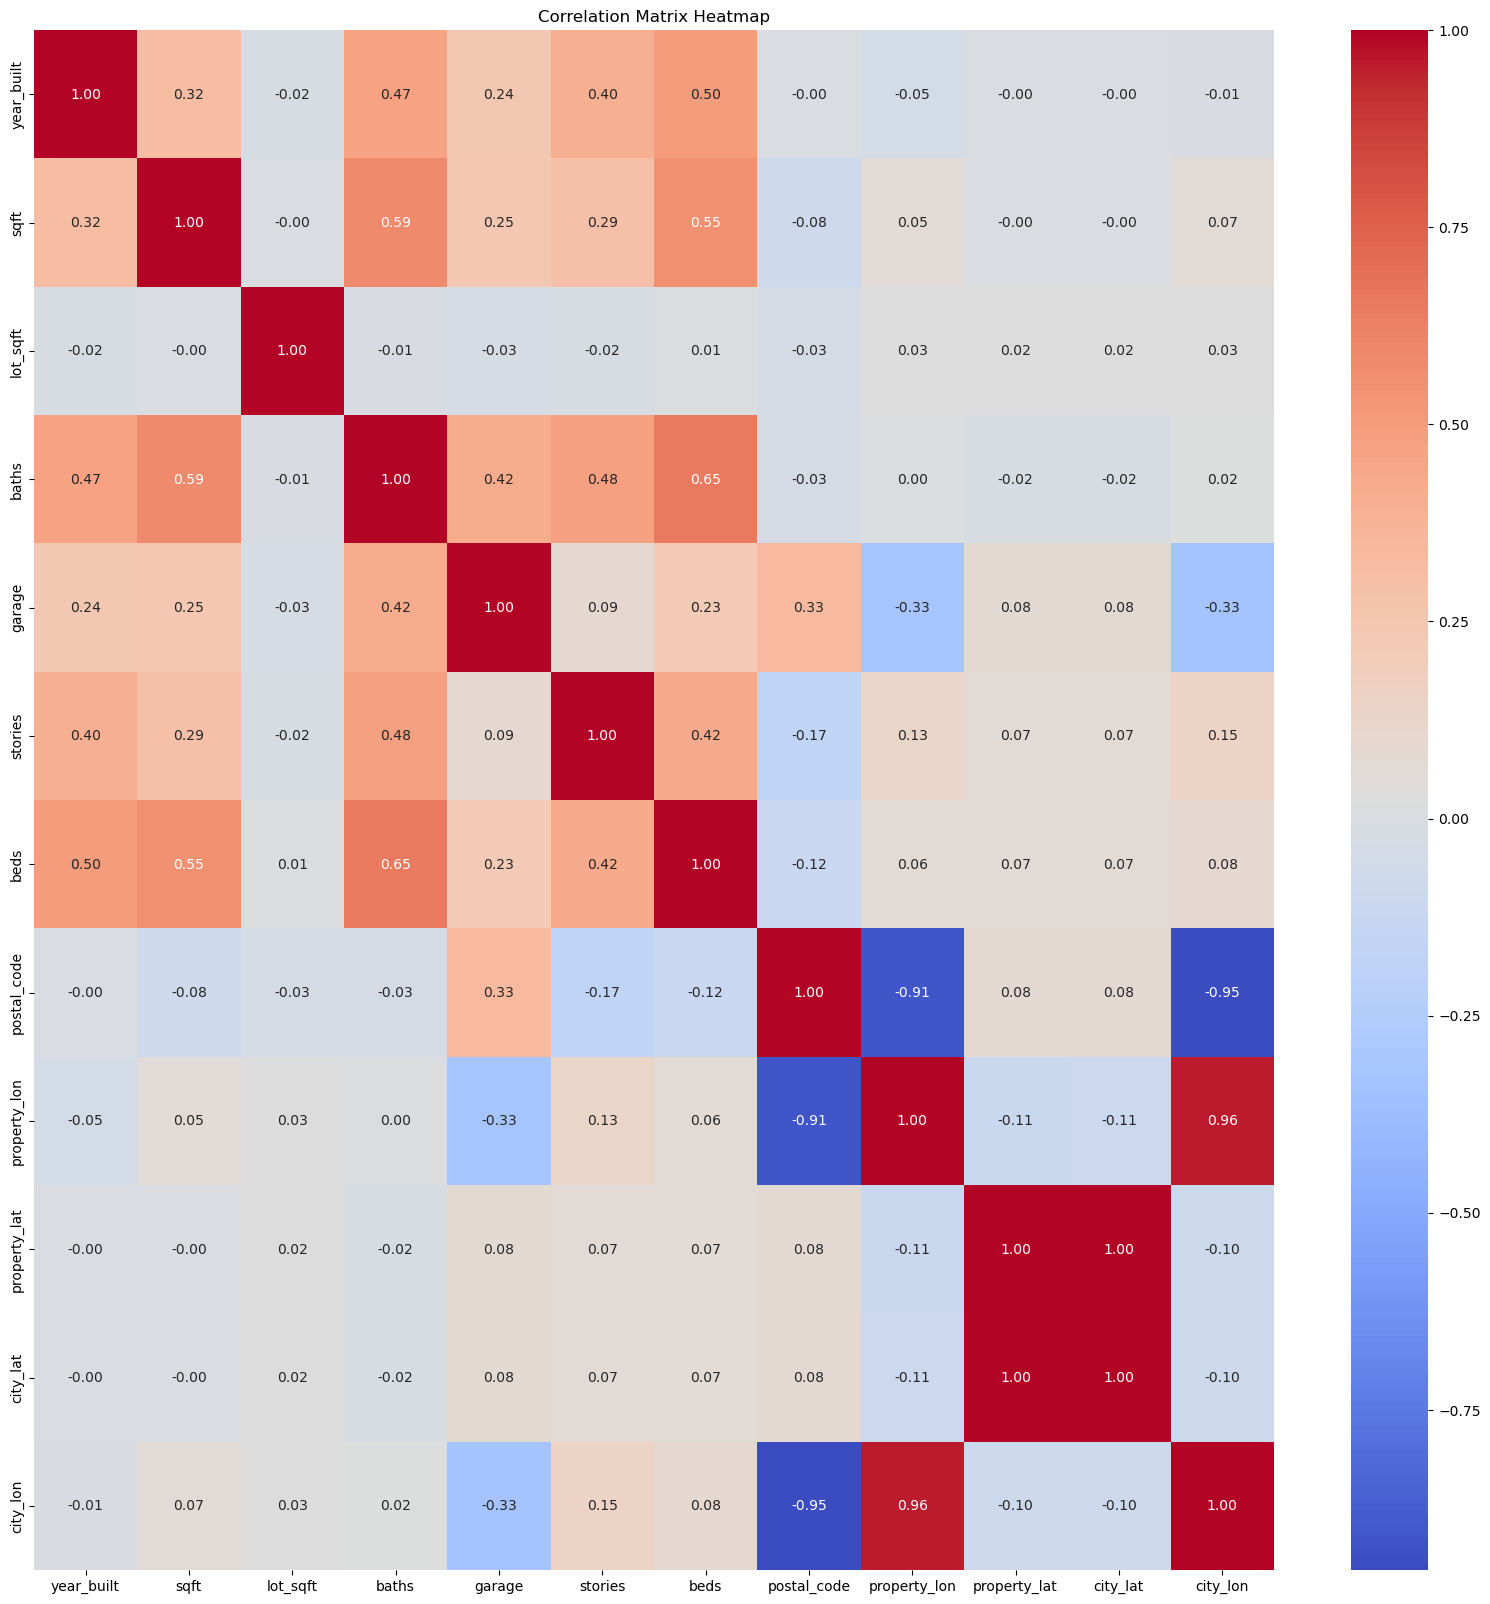

In [37]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

 - We can see a very large correlation in all of the location data, having 3 seperate location sets might be excessive and may end up swaying the data, will probably look at combining them into one or dropping some of them

## Finishing Up and Saving

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [38]:

#save the data, we will take a full save of it all as both a csv and a pickle so that we have it backed up, then we will also save the X/y train/test data seperately as well.
df.to_csv('../data/processed/data_complete.csv')
df.to_pickle('../data/processed/data_complete.pkl')
X_test.to_pickle('../data/processed/X_test.pkl')
X_train.to_pickle('../data/processed/X_train.pkl')
y_test.to_pickle('../data/processed/y_test.pkl')
y_train.to_pickle('../data/processed/y_train.pkl')